# Coding session pt. 1:
----

### *Table of contents:*
1. Quantum circuits and registers:
    * Creating circuit
    * Plotting circuit
    * State initialization
2. Running quantum experiments:
    * Measurement and simulations
    * Results analysis
    * Anatomy of quantum algorithms routines
3. 1-qubit quantum gates:
    * Bit-flip gate: X Pauli gate
    * Manipulating probabilities - X rotation gate.
    >Backup:  
        - Rest of Pauli gates: Y and Z  
        - "Prepare states from quantum gates!" - Pop quiz
4. Multi-qubit gates:
    * CNOT gate
    * Simplest entangling state - Bell states

## 1. Quantum circuits and registers:

Quantum circuits are build from set of qubits called quantum registers and classical bits called classical registers.
Classical registers are needed to store the measurement info of each of the qubits. So, for each qubit we'll measure we need one classical bit.

Now, let's create circuit with 2 qubits, when we'll measure both of them:

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


qr = QuantumRegister(2) # number of qubits
cr = ClassicalRegister(2) # number of qubits

qc = QuantumCircuit(qr, cr)

How to check, if it's working? Let's draw the circuit with build-in function. 
It returns the string (if we pass 'text' as the parameter), matplotlib figure (if we pass the 'mpl') or other formats. 
We can plot it with display function:

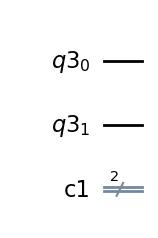

In [8]:
display(qc.draw('mpl'))

### Challenge 1:


Try to create quantum circuit same as before, but from two separate one-qubits quantum registers

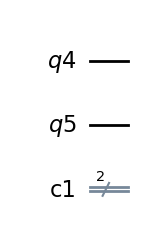

In [9]:
qr0, qr1 = QuantumRegister(1), QuantumRegister(1)

qc_ch1 = QuantumCircuit(qr0, qr1, cr)

qc_ch1.draw('mpl')

Now, we can't do much with empty circuit. Whole magic of quantum computing comes from manipulating quantum state to get outcomes which interest us. We need to start with preparing qubits in some initial state. Let's start with simple case of two qubits in state `|1>` and `|0>`:

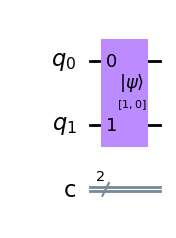

In [10]:
qc = QuantumCircuit(2,2)

# We can prepare it in Qiskit with one-liner:
qc.initialize('10')

qc.draw('mpl')

For more quantum case, we can introduce the superposition of states. Let's prepare the register in equal combination of states `|00>`, `|01>`, `|10>` and `|11>`.  
We can use again `initialize` method, but this time we need explicit array defining the quantum state s.c. **statevector**.   

It's a vector describing probabilities of finding our quantum system in each of the subsequent states. Let's try pass probabilities into our code: 

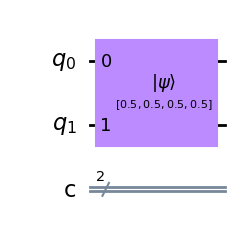

In [11]:
qc = QuantumCircuit(2,2)

qc.initialize([1/2, 1/2, 1/2, 1/2])

qc.draw('mpl')

We are getting error, because quantum states are described fully by the complex numbers called **amplitudes**, not probabilities.
For one qubit, we can describe quantum state as linear combination:
$$
|\psi\rangle = \alpha |0\rangle + \beta |1 \rangle
$$

Where $|\alpha|^2$ is a probability of finding qubit in a state `|0>` and $|\beta|^2$ is a probability of finding qubit in a state `|1>`. 
Statevector for this system will be:
$$
|\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} 
$$

For two qubit system from our example of equal superposition, we need four aplitudes:
$$
|\psi\rangle = \alpha_{00} |00\rangle + \alpha_{01} |01 \rangle + \alpha_{10} |10\rangle + \alpha_{11} |11 \rangle
$$

All four's coefficients squared magnitudes needs to give 0.25 (25% prob.).
Since the amplitudes are complex in general, we have some freedom to choose them. Let's take simplest, real case - all alphas are equal $\frac{1}{2}$:

$$
|\psi\rangle = \begin{bmatrix} \alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha_{11} \end{bmatrix} = \begin{bmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{bmatrix} 
$$

That prepared statevector we can pass to our circuit:

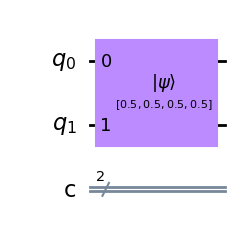

In [12]:
qc = QuantumCircuit(2,2)
qc.initialize([1/2, 1/2, 1/2, 1/2])

qc.draw('mpl')

### Challenge 2:

Let's initialize quantum circuit with statevector of first qubit in a state `|1>` and second qubit in an equal superposition. 
> ***(Qu)bit ordering***: in Qiskit we are using little endian notation. For example, $|01\rangle$ state describes two qubit systems, where first qubit is in a state $|1\rangle$ and the second in $|0\rangle$.

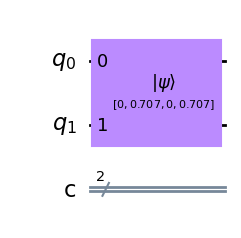

In [13]:
from math import sqrt


qc_ch2 = QuantumCircuit(2,2)
qc_ch2.initialize([0, 1/sqrt(2), 0, 1/sqrt(2)])

qc_ch2.draw('mpl')

## 2. Anatomy of quantum algorithms workflow:

To check if the state preparation routine works, we need to simulate our quantum circuit and examine its state.  
In nature, superposition of quantum states can't be directly observed, we always measure system in particular state. E.g. for one qubit in a superposition of 

$$
|\psi\rangle = \frac{1}{16} |0\rangle + \frac{9}{16} |1 \rangle
$$

We will always get state `|0>` or `|1>` from the measurement, but after collecting results of thousands of experiments for this state, we will get around `|0>` as $P_{|0\rangle} = |\frac{1}{16}|^2 = 25\%$ of results and the rest as `|1>`.

Exactly this way we are collecting results from quantum computers - we repeat the measurements defined number of times, called **shots**, and calculate quasi-probabilities of each state. 
> **Classical quantum simulators**: To mimic this behaviour on classical computers, we are simulating quantum state in an exact form (e.g. using statevectors) and at the end sample measurement outcome many times based on true, simulated probabilities. 

Let's simulate our recent circuit with equal superposition on 2 qubits to see this in action. To enable it, we need to add measurement operations of two qubits on it's classical registers counterparts:

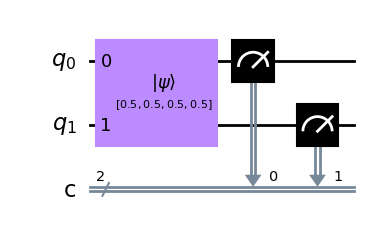

In [14]:
qc = QuantumCircuit(2,2)

qc.initialize([1/2, 1/2, 1/2, 1/2])

qc.measure([0,1], [0,1])

qc.draw('mpl')

Then we prepare the simulator and run the circuit on it. 
We simulate the measurement and repeat many times (defined by the number of `shots`) to get the quasi-probabilities of the system states.
Results of the simulation are counts so dictionary with states as keys and number, how many time we measured system in this state:

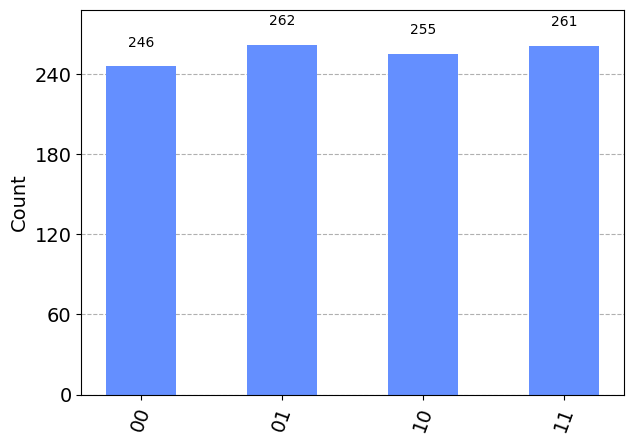

In [15]:
from qiskit_aer import aer_simulator
from qiskit.visualization import plot_distribution, plot_histogram


sim = aer_simulator.AerSimulator(method='statevector')

experiment = sim.run(qc, shots=1024)
results = experiment.result()
counts = results.get_counts()

plot_histogram(counts)

Now, based on counts let's plot quasi-probabilities:

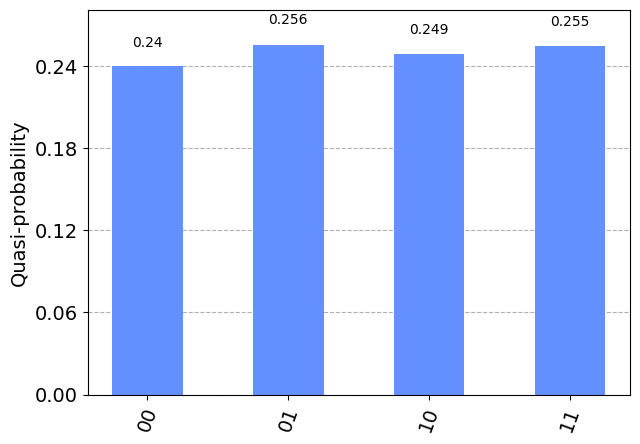

In [16]:
plot_distribution(counts)

It look's like they are fairly equal for this amount of shots.

For more shots, we'll observe that quasiprobabilities will be closer and closer to true probabilities of quantum states:

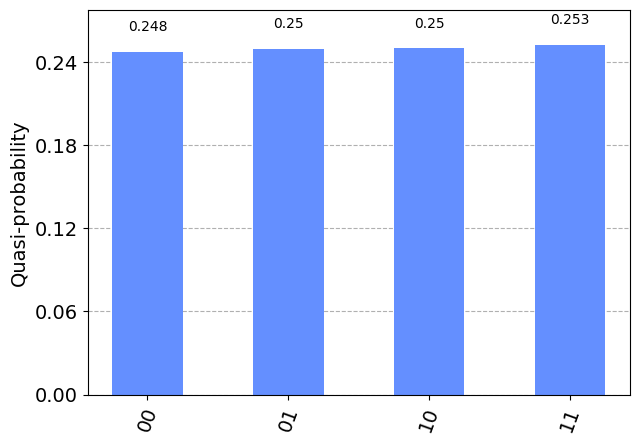

In [17]:
experiment = sim.run(qc, shots=100000)
counts = experiment.result().get_counts()

plot_distribution(counts, )

### Challenge 3:

Let's take a circuit from challenge 2. We already know that first qubit is in state `|1>` and we are curious about the distribution of second qubit states. 
Simulate the circuit, measure the last qubit only, and plot the quasi-probabilities: 

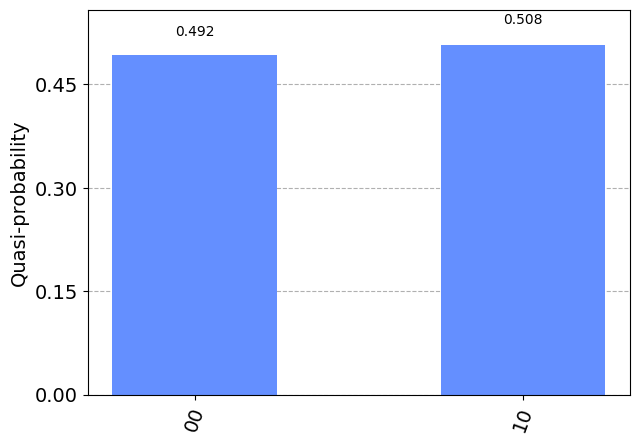

In [18]:
qc_ch2.measure(1, 1)
qc_ch2.draw('mpl')

experiment = sim.run(qc_ch2, shots=1024)
results = experiment.result()
counts = results.get_counts()

plot_distribution(counts)

At the end of this part we'll add last part of each of the quantum circuits routine runs.  
After preparing the qubits in an initial state, we usually apply the transformation, depending on quantum algorithm we are runnig.  
>This transformation can be as simple as i.e. changing one qubit state, based on the other qubit's state or shifting the probabilities on some toy examples.
>They can be also more complex as evolving the state of the encoded molecule allowing to calculate their energy time evolution.

Knowing this, we can show schematically how routines of using quantum circuits within quantum algorithms looks like in general:

![Quantum_routine_scheme](./assets/quantum_alg_routine.png)

Now, how can this transformation looks like?  
It's just quantum gates, similar to classical `NOT`, `OR` or `XOR` gates applied on one or more qubits.  
We'll deep dive into them in the parts below.  
> This approach works on 'gate-based' quantum computers (i.e. IBM's ones). However, there are quantum backends which don't use quantum gates paradigm i.e. quantum annealers (D-WAVE) or quantum analog computers (PASQAL).  

## 3. 1-qubits quantum gates:

We'll start with one qubit gates, the simplest ones. 

Let's take two qubit, empty circuit. Our qubits are by default in the state `|0>`, let's change both of them to state `|1>`.  
To do it we can use X-gate (called also `bit-flip` gate). Let's apply them on our quantum circuit.  
 All standard gate are build-in functions in quantum circuit class (Check the list in the [Qiskit's  documentation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)).   

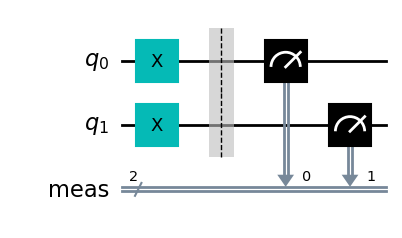

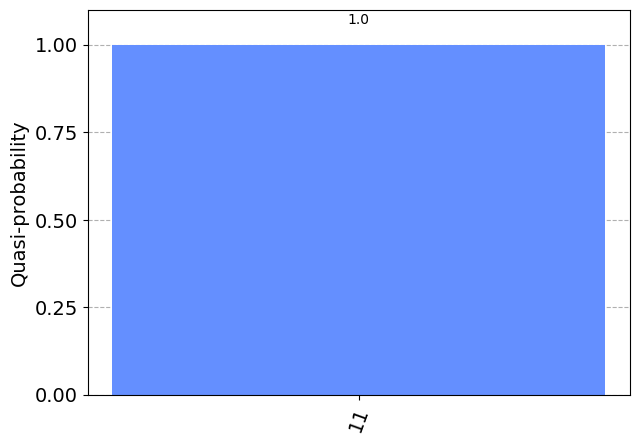

In [19]:
qc = QuantumCircuit(2)

qc.x(0)
qc.x(1)
qc.measure_all()

display(qc.draw('mpl'))

counts = sim.run(qc, shots=1024).result().get_counts()

plot_distribution(counts)

### Challenge 4:


Try to create quantum circuit same as before, but apply X gate on two qubits in one `qc.x(...)` method call:

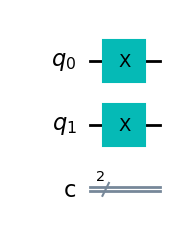

In [20]:
qc = QuantumCircuit(2,2)

qc.x([0,1])

qc.draw('mpl')

This gate is usefull, but there's nothing `quantum` there. To change that, we want to shift the state of given qubit from `|0>` to superposition. To do this, one can use an $X$ rotation gate, i.e. a $R_X(\theta)$-gate. The $R_X(\theta)$-gate will bring a qubit that's starting in the $|0\rangle$ to the state

$$ R_X(\theta) |0\rangle = \cos{\theta/2} |0\rangle - i \sin{\theta/2} |1\rangle , $$

which we can alter in order to get the desired result. 
To understand its consequences, let's parametrize it from probability $P$ of measuring the qubit in a state `|1>`.   
We do it by setting $\theta = 2 \sin^{-1}\sqrt{P}$.
Let's see that in action for one qubit set in superposition, where prob. of getting `|1>` is 75%:

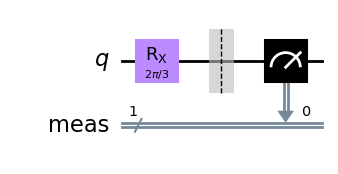

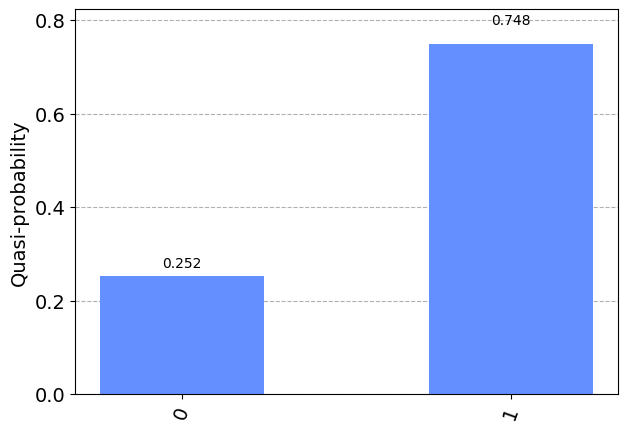

In [21]:
import numpy as np


qc = QuantumCircuit(1)

p = 0.75  # probability
theta = 2 * np.arcsin(np.sqrt(p)) 

qc.rx(theta, 0)
qc.measure_all()

display(qc.draw('mpl'))

counts = sim.run(qc, shots=10000).result().get_counts()

plot_distribution(counts)

### Challenge 5:

Recreate circuit from challenge 2 using only X rotation gates and plot the final quasi-probabilities:

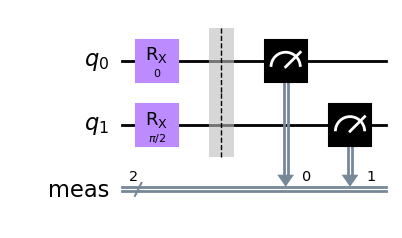

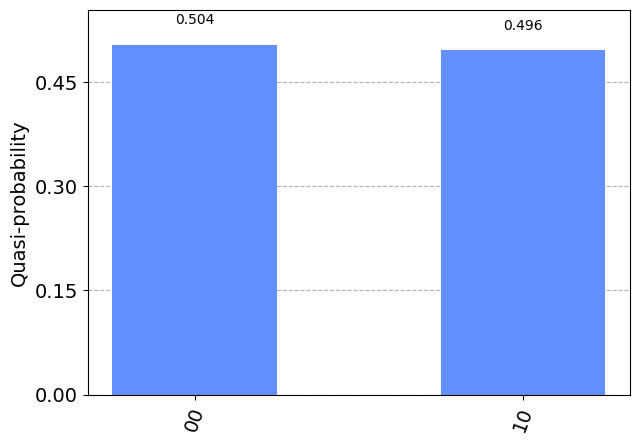

In [22]:
import numpy as np


qc = QuantumCircuit(2)

qc.rx(2 * np.arcsin(np.sqrt(0)), 0)
qc.rx(2 * np.arcsin(np.sqrt(0.5)), 1)
qc.measure_all()

display(qc.draw('mpl'))

counts = sim.run(qc, shots=10000).result().get_counts()

plot_distribution(counts)

Congratulations! If you want to encode probabilites into qubit you can do it with X rotation gates! You don't need an `initial_state` method anymore!

### 3.3 Rest of Pauli gates: Y and Z

In [23]:
### [TO ADD]

### 3.4 "Prepare states from quantum gates!" - Pop quiz

In [24]:
### [TO ADD]

## 4. Many-qubits quantum gates:


### 4.1 Controlled NOT (CNOT) gate:

A CNOT gate, or Controlled-NOT gate, is a two-qubit gate in quantum computing. It performs a NOT operation (bit-flip) on the target qubit (the second qubit) only if the control qubit (the first qubit) is in the state |1⟩. If the control qubit is in the state |0⟩, the target qubit remains unchanged:

| Control | Target | Output |
|---------|--------|---------------|
|    \|0⟩   |   \|0⟩  |      \|00⟩      |
|    \|0⟩   |   \|1⟩  |      \|01⟩      |
|    \|1⟩   |   \|0⟩  |      \|11⟩      |
|    \|1⟩   |   \|1⟩  |      \|10⟩      |

Check this out on two, 2-qubit circuits:
    1. initiated in state `|00>`
    2. initiated in state `|01>`

where first qubit is control and second the target:

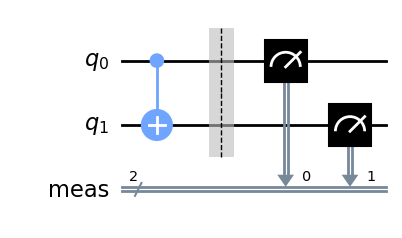

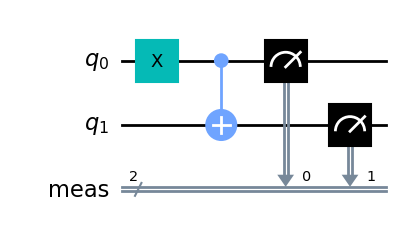

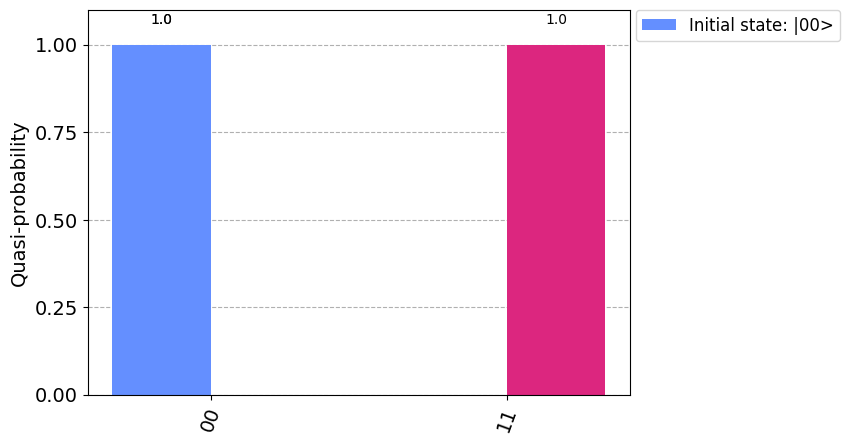

In [25]:
qc = QuantumCircuit(2)

qc.cnot(0, 1)
qc.measure_all()
display(qc.draw('mpl'))
counts_00 = sim.run(qc, shots=1024).result().get_counts()

qc.clear()
qc.x(0)
qc.cnot(0, 1)
qc.measure([0,1],[0,1])
display(qc.draw('mpl'))
counts_01 = sim.run(qc, shots=1024).result().get_counts()

plot_distribution([counts_00, counts_01], legend=['Initial state: |00>', 'Initial state: |01>'])

### Challenge 8:

CNOT always flips the target qubit if the control qubit is in state `|1>`. What gates we need to apply to flip the target qubit if the control qubit is in the state `|0>` only?

['0', '0']


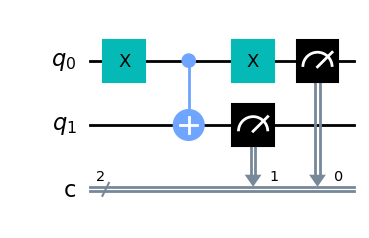

['1', '0']


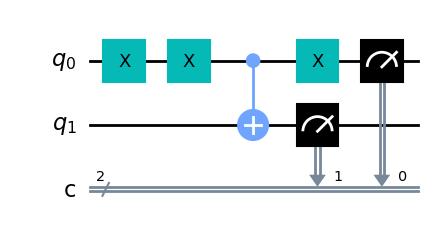

['0', '1']


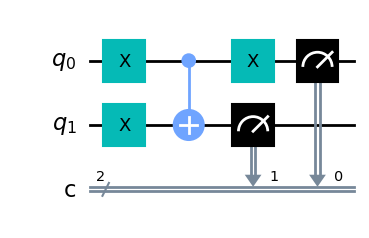

['1', '1']


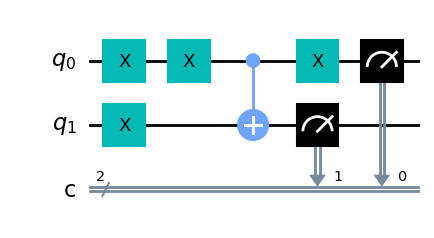

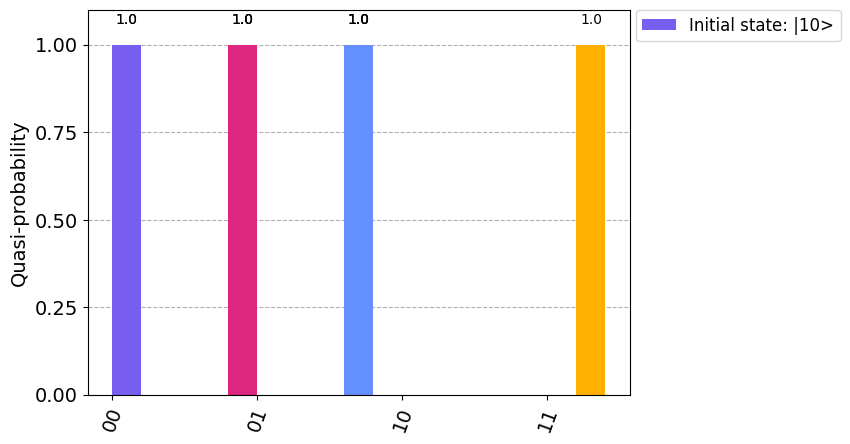

In [26]:
# also cnot but with the X gate applied before and after on control qubit.

qc = QuantumCircuit(2,2)

counts = []
for i in range(4):
    bin_i = list(f'{i:0{2}b}')[::-1]
    qc.clear()
    
    print(bin_i)
    if len(np.argwhere(np.array(bin_i)=='1').flatten())>0:
        qc.x(np.argwhere(np.array(bin_i)=='1').flatten())
    qc.x(0)    
    qc.cnot(0, 1)
    qc.x(0)    
    
    qc.measure([0,1],[0,1])
    display(qc.draw('mpl'))
    counts.append(sim.run(qc, shots=1024).result().get_counts())

plot_distribution(counts, legend=[f'Initial state: |{i:0{2}b}>' for i in range(4)])

### 4.2 Simplest Entangling state - Bell state (EPR pair):

That was easy. Time to use that to show quantum computing phenomena which is unavailable classicaly - entanglement. Let's prepare two qubit circuit, with maximally entangled pair. That means they are both in a state `|00>` or `|11>` with equal probabilites. 


$$ |\Phi^+\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}} $$

If we measure on of them in some state, we know, that the second qubit is in the same state. 
We are preparing it with the Hadamard gate applied on a first qubit and then `CNOT` gate (aka. `controlled X`) controlled by the first qubit with the target on the second qubit:

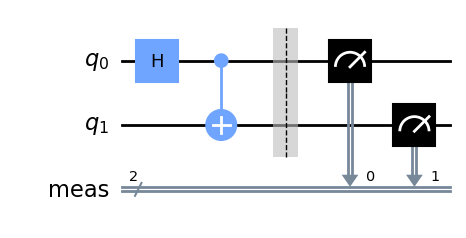

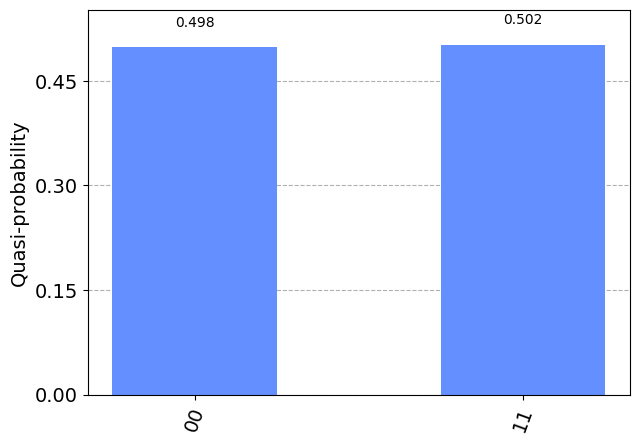

In [27]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.measure_all()
display(qc.draw('mpl'))

counts = sim.run(qc, shots=10000).result().get_counts()

plot_distribution(counts)

### Challenge 7:

Prepare the entangled state with qubits in a state |01> or |10> only:

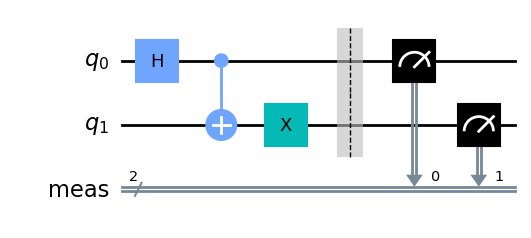

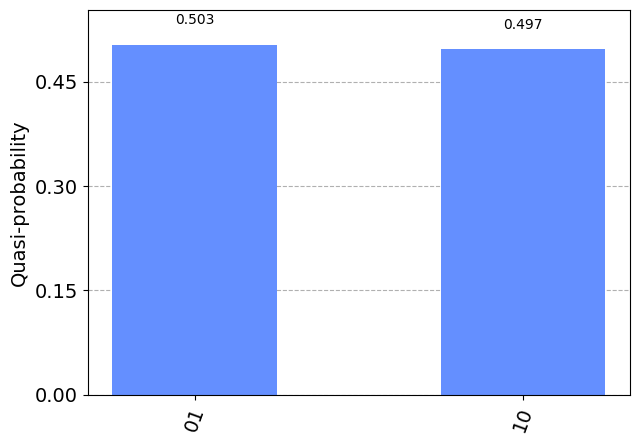

In [28]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.x(1)

qc.measure_all()
display(qc.draw('mpl'))

counts = sim.run(qc, shots=10000).result().get_counts()

plot_distribution(counts)

### Congratulations!

You understand basics of quantum computing and can implement them in Qiskit!
You can implement end-to-end simple quantum algorithm routine and know its anatomy!
